In [25]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Text cleaning
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
# Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.preprocessing.text import Tokenizer;

# Read the feedback text

In [26]:
datas = pd.read_csv('text.csv')
df = pd.DataFrame(datas)

In [27]:
df = df.fillna(1)

In [28]:
df.sentiment.value_counts()

sentiment
0.0    90
1.0    90
Name: count, dtype: int64

## TEXT Cleaning

In [29]:
# Clean the data
def clean_text(text):
    
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    
    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [30]:
# Apply the cleaning

df['text'] = df['text'].apply(clean_text)

In [31]:
df

,text,sentiment
0,ascensor arreglado gracia,0.0
1,gracia por resolv el ascensor,0.0
2,ascensor ok aprecio la rapidez,0.0
3,gracia por el ascensor de vuelta,0.0
4,ascensor solucionado gracia mil,0.0
...,...,...
175,conflicto persist necesitamo mediaci n urgent,1.0
176,problema recurrent conflicto requier soluci n ...,1.0
177,conflicto no resuelto atenc n urgent necesaria,1.0
178,inconvenient constant exigimo arreglo necesario,1.0


Delete duplicates

In [32]:
df.duplicated().sum()

5

In [33]:
df = df[~df.duplicated()]

Any Nans?

In [34]:
df.isna().value_counts()

text   sentiment
False  False        175
Name: count, dtype: int64

Text lenght frequency

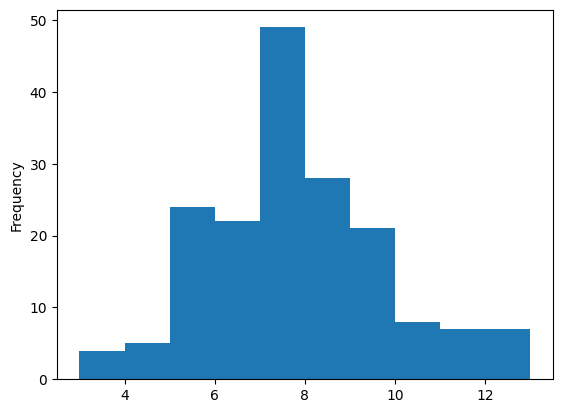

In [35]:
df['text'].apply(lambda x: len(x.split())).plot(kind='hist');

# MODEL

In [36]:
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                    ('lr_clf', LogisticRegression())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



## Confusion matrix and accuracy score

In [37]:
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[20  0]
 [ 0 15]]


1.0

## Testing our MODEL

TEXT

In [38]:
X[1]

'gracia por resolv el ascensor'

Predicted sentiment:

In [39]:
pipeline.predict([X[1]])

array([0.])

Real sentiment:

In [40]:
df.sentiment[1]

0.0

TEXT

In [41]:
X[177]

'conflicto no resuelto atenc n urgent necesaria'

Predicted sentiment:

In [42]:
pipeline.predict([X[177]])

array([1.])

Real sentiment

In [43]:
df.sentiment[177]

1.0

# Conclusion

##### With our model we can determine if a text contains positive feedback (0) or negative feedback (1).